# DESEq2 for DA peaks per cell type on peaks called by refined annotation

## Load packages from new environment

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()
# sessionInfo()
Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/bin/python")

suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(dplyr)) 
suppressMessages(library(ggplot2)) 
suppressMessages(library(Matrix)) 
suppressMessages(library(data.table)) 
suppressMessages(library(ggpubr)) 
suppressMessages(library(ggplot2))
suppressMessages(library(pheatmap))
suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
suppressMessages(library("ggrepel"))

[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"                     
[2] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘Matrix’ was built under R version 4.3.3”
Warning message:
“package ‘qlcMatrix’ was built under R version 4.3.3”
Warning message:
“package ‘slam’ was built under R version 4.3.3”
Warning message:
“package ‘sparsesvd’ was built under R version 4.3.3”
Warning message:
“package ‘ggeasy’ was built under R version 4.3.3”
Warning message:
“package ‘svglite’ was built under R version 4.3.3”
Warning message:
“package ‘ape’ was built under R version 4.3.3”
Warning message:
“package ‘ggforce’ was built under R version 4.3.3”
Warning message:
“package ‘edgeR’ was built under R version 4.3.3”
Warning message:
“package ‘limma’ was built under R version 4.3.3”
Warning message:
“package ‘apeglm’ was built under R version 4.3.3”
Warning message:
“package ‘DESeq2’ was bu

# Read Seurat object after new peak calling

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [3]:
adata<-readRDS(file="merged_clusters_after_genotyping_after_refined_annotation_new_peaks.rds")


In [4]:
adata


An object of class Seurat 
749604 features across 16835 samples within 5 assays 
Active assay: ATAC (340606 features, 340606 variable features)
 2 layers present: counts, data
 4 other assays present: RNA, RNA_raw, SCT, ATAC_by_refined_annotation
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

In [5]:
colnames(adata@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

## Create a variable to correct for clone line and time_point

In [6]:
 adata$sample_id<-droplevels(interaction(adata$clone_line,adata$time_point, sep="_"))
  
cat(sprintf(as.character(names(summary(adata$sample_id)))))
cat("\n")
cat(sprintf(as.character(summary(adata$sample_id))))
cat("\n")

wt_1_Day_0 wt_2_Day_0 wt_3_Day_0 rs62237617_1_Day_0 rs62237617_2_Day_0 rs62237617_3_Day_0 DNMT3A_1_Day_0 DNMT3A_2_Day_0 DNMT3A_3_Day_0 rs62237617_DNMT3A_1_Day_0 rs62237617_DNMT3A_2_Day_0 rs62237617_DNMT3A_3_Day_0 wt_1_Day_8 wt_2_Day_8 wt_3_Day_8 rs62237617_1_Day_8 rs62237617_2_Day_8 rs62237617_3_Day_8 DNMT3A_1_Day_8 DNMT3A_2_Day_8 DNMT3A_3_Day_8 rs62237617_DNMT3A_1_Day_8 rs62237617_DNMT3A_2_Day_8 rs62237617_DNMT3A_3_Day_8 wt_1_Day_12 wt_2_Day_12 wt_3_Day_12 rs62237617_1_Day_12 rs62237617_2_Day_12 rs62237617_3_Day_12 DNMT3A_1_Day_12 DNMT3A_2_Day_12 DNMT3A_3_Day_12 rs62237617_DNMT3A_1_Day_12 rs62237617_DNMT3A_2_Day_12 rs62237617_DNMT3A_3_Day_12 wt_1_Day_15 wt_2_Day_15 wt_3_Day_15 rs62237617_1_Day_15 rs62237617_2_Day_15 rs62237617_3_Day_15 DNMT3A_1_Day_15 DNMT3A_2_Day_15 DNMT3A_3_Day_15 rs62237617_DNMT3A_1_Day_15 rs62237617_DNMT3A_2_Day_15 rs62237617_DNMT3A_3_Day_15
60 132 80 130 119 242 893 98 2277 506 600 715 6 29 18 9 11 30 68 9 24 19 11 25 58 33 113 348 319 3134 77 13 35 618 65 92 6 3

## Extract peak_subset counts

In [7]:
matrix_ATAC<-GetAssayData(object = adata, assay = "ATAC", layer = "counts")
  
  cat("matrix_ATAC\n")
  cat(str(matrix_ATAC))
  cat("\n")

matrix_ATAC
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:130903814] 3 6 49 104 110 156 294 474 523 754 ...
  ..@ p       : int [1:16836] 0 4089 11554 20087 36626 50177 65911 75543 93596 97760 ...
  ..@ Dim     : int [1:2] 340606 16835
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  .. ..$ : chr [1:16835] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCAGGAAGCC-1" "MCO_01326_AAACAGCCAGTATGTT-1" "MCO_01326_AAACATGCAAACGCGA-1" ...
  ..@ x       : num [1:130903814] 1 3 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()



## Extract metadata

In [8]:
metadata<-adata[[]]

cat(sprintf(as.character(names(summary(metadata$time_point)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$time_point))))
  cat("\n")
  
  
  cat(sprintf(as.character(names(summary(metadata$refined_annotation_majority_vote)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$refined_annotation_majority_vote))))
  cat("\n")


  
  cat(sprintf(as.character(names(summary(as.factor(metadata$clone_line))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$clone_line)))))
  cat("\n")
  
  cat(sprintf(as.character(names(summary(as.factor(metadata$sample_id))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$sample_id)))))
  cat("\n")

Day_0 Day_8 Day_12 Day_15
5852 259 4905 5819
hESC HemogenicEndothelium MEP early erythroid early MK MK PolyPlo MK
5853 236 2693 914 108 2863 4168
wt_1 wt_2 wt_3 rs62237617_1 rs62237617_2 rs62237617_3 DNMT3A_1 DNMT3A_2 DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3
130 226 305 872 776 7996 1101 123 2355 1381 706 864
wt_1_Day_0 wt_2_Day_0 wt_3_Day_0 rs62237617_1_Day_0 rs62237617_2_Day_0 rs62237617_3_Day_0 DNMT3A_1_Day_0 DNMT3A_2_Day_0 DNMT3A_3_Day_0 rs62237617_DNMT3A_1_Day_0 rs62237617_DNMT3A_2_Day_0 rs62237617_DNMT3A_3_Day_0 wt_1_Day_8 wt_2_Day_8 wt_3_Day_8 rs62237617_1_Day_8 rs62237617_2_Day_8 rs62237617_3_Day_8 DNMT3A_1_Day_8 DNMT3A_2_Day_8 DNMT3A_3_Day_8 rs62237617_DNMT3A_1_Day_8 rs62237617_DNMT3A_2_Day_8 rs62237617_DNMT3A_3_Day_8 wt_1_Day_12 wt_2_Day_12 wt_3_Day_12 rs62237617_1_Day_12 rs62237617_2_Day_12 rs62237617_3_Day_12 DNMT3A_1_Day_12 DNMT3A_2_Day_12 DNMT3A_3_Day_12 rs62237617_DNMT3A_1_Day_12 rs62237617_DNMT3A_2_Day_12 rs62237617_DNMT3A_3_Day_12 wt_1_Day_1

## Create a new Seurat object with the ATAC and the metadata

In [9]:
ATAC_object <- CreateSeuratObject(counts = matrix_ATAC, assay = "RNA",
                                   meta.data=metadata)

ATAC_object

An object of class Seurat 
340606 features across 16835 samples within 1 assay 
Active assay: RNA (340606 features, 0 variable features)
 1 layer present: counts

## Seurat2PB Aggregate by sample_id (clone line) and seurat_cluster

In [10]:
 cluster_names <- levels(metadata[,which(colnames(metadata) == 'refined_annotation_majority_vote')])
  
  cat("cluster_names_0\n")
  cat(str(cluster_names))
  cat("\n")
  
  sample_names <- levels(metadata[,which(colnames(metadata) == 'sample_id')])
  
  cat("sample_names_0\n")
  cat(str(sample_names))
  cat("\n")
  
  groups <- metadata[,c(which(colnames(metadata) == 'sample_id'),which(colnames(metadata) == 'refined_annotation_majority_vote'))]
  
  cat("groups_0\n")
  cat(str(groups))
  cat("\n")
  
  aggr_counts <- Seurat2PB(ATAC_object, sample="sample_id", cluster="refined_annotation_majority_vote")
  
  cat("aggr_counts_0\n")
  cat(str(aggr_counts))
  cat("\n")

cluster_names_0
 chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" "early MK" ...

sample_names_0
 chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...

groups_0
'data.frame':	16835 obs. of  2 variables:
 $ sample_id                       : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...
 $ refined_annotation_majority_vote: Ord.factor w/ 7 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...

aggr_counts_0
Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:340606, 1:131] 1 18 4 805 13 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  .. .. .. ..$ : chr [1:131] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_12_clusterearly erythroid" "DNMT3A_1_Day_12_clusterMEP" "DNMT3A_1_Day_12_clusterMK" ...
  .. ..$ :'data.frame':	131 obs. of  5 variables:
  .. .. ..$ group  

## List of count subsets

In [11]:
 ## Initiate empty list
  counts_ls <- list()
  
  DEBUG<-0
  

for (i in 1:length(cluster_names)) {
    
    cluster_names[i]
    
    ## Extract indexes of columns in the global matrix that match a given cluster
    column_idx <- which(tstrsplit(colnames(aggr_counts), "_cluster")[[2]] == cluster_names[i])
    
    sub_aggr<- aggr_counts[, column_idx]
    
    if(DEBUG == 1)
    {
      cat("sub_aggr_0\n")
      cat(str(sub_aggr))
      cat("\n")
      
    }
    
    ## Store corresponding sub-matrix as one element of a list
    counts_ls[[i]] <-sub_aggr
    names(counts_ls)[i] <- cluster_names[i]

    #break
    
  }

In [12]:
# cat("counts_ls_0\n")
# cat(str(counts_ls))
# cat("\n")



## List of metadata

In [13]:
colnames(metadata)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

### metadata_NEW df

In [14]:
#### Create group level variables -----
  
  # Extract sample-level variables
  metadata_NEW <- metadata %>% 
    as.data.frame() %>% 
    dplyr::select(Genotype, clone_line, time_point, sample_id)
  
cat("metadata_NEW_0\n")
  cat(str(metadata_NEW))
  cat("\n")
  
  # Exclude duplicated rows
  metadata_NEW <- metadata_NEW[!duplicated(metadata_NEW), ]


cat("metadata_NEW_0.5\n")
  cat(str(metadata_NEW))
  cat("\n")
  
 
  # Rename rows
  rownames(metadata_NEW) <- metadata_NEW$sample_id
  
  cat("metadata_NEW_1\n")
  cat(str(metadata_NEW))
  cat("\n")


names(metadata_NEW)

metadata_NEW_0
'data.frame':	16835 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 3 3 4 3 3 3 3 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 7 7 11 7 7 9 9 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...

metadata_NEW_0.5
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 12 3 6 10 8 5 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 11 12 3 6 10 8 5 ...

metadata_NEW_1
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 1

[1] "Genotype"   "clone_line" "time_point" "sample_id"

### Count table

In [15]:
t <- table(metadata$sample_id,
             metadata$refined_annotation_majority_vote)
  
  cat("t_0\n")
  cat(str(t))
  cat("\n")

t

t_0
 'table' int [1:48, 1:7] 60 132 80 130 119 242 893 98 2277 506 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...
  ..$ : chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...



                            
                             hESC HemogenicEndothelium  MEP early erythroid
  wt_1_Day_0                   60                    0    0               0
  wt_2_Day_0                  132                    0    0               0
  wt_3_Day_0                   80                    0    0               0
  rs62237617_1_Day_0          130                    0    0               0
  rs62237617_2_Day_0          119                    0    0               0
  rs62237617_3_Day_0          242                    0    0               0
  DNMT3A_1_Day_0              893                    0    0               0
  DNMT3A_2_Day_0               98                    0    0               0
  DNMT3A_3_Day_0             2277                    0    0               0
  rs62237617_DNMT3A_1_Day_0   506                    0    0               0
  rs62237617_DNMT3A_2_Day_0   600                    0    0               0
  rs62237617_DNMT3A_3_Day_0   715                    0    0

### List population

In [16]:
##### Creating metadata list ----------------
  
  ## Initiate empty list
  metadata_ls <- list()
  
  DEBUG<-0
  
  for (i in 1:length(counts_ls)) {
    
    ## Initiate a data frame for cluster i with one row per sample (matching column names in the counts matrix)
    df <- data.frame(refined_annotation_majority_vote_sample_id = colnames(counts_ls[[i]]))

      if(DEBUG == 1){

         cat("df_0\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Use tstrsplit() to separate cluster (cell type) and sample IDs
    df$refined_annotation_majority_vote_id <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[2]]
    df$sample_id  <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[1]]
    
    
     if(DEBUG == 1){

         cat("df_1\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Retrieve cell count information for this cluster from global cell count table
    idx <- which(colnames(t) == unique(df$refined_annotation_majority_vote_id))

       if(DEBUG == 1){

                 cat("idx_0\n")
                 cat(str(idx))
                 cat("\n")          
           }
      
    cell_counts <- t[, idx]

       if(DEBUG == 1){

                 cat("cell_counts_0\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }
 
    
    
    
    
    
    ## Remove samples with zero cell contributing to the cluster
    
    cell_counts <- cell_counts[cell_counts > 0]
    
    if(DEBUG == 1){

                 cat("cell_counts_1\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

    names_of_vector<-names(cell_counts)

        if(DEBUG == 1){

                 cat("names_of_vector_0\n")
                 cat(str(names_of_vector))
                 cat("\n")          
           }
    
    
    ## Match order of cell_counts and sample_ids
    sample_order <- which(df$sample_id%in%names_of_vector)

       if(DEBUG == 1){

                 cat("sample_order_0\n")
                 cat(str(sample_order))
                 cat("\n")          
           }
    cell_counts <- cell_counts[sample_order]

      if(DEBUG == 1){

                 cat("cell_counts_2\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

      cell_counts_df<-as.data.frame(cbind(cell_counts,names(cell_counts)))

      colnames(cell_counts_df)<-c("cell_count","sample_id")

      cell_counts_df$cell_count<-as.integer(cell_counts_df$cell_count)

        if(DEBUG == 1){

                 cat("cell_counts_df_0\n")
                 cat(str(cell_counts_df))
                 cat("\n")          
           }
    
    
    
    ## Merge cell_counts to data frame

      df<-merge(df,
                cell_counts_df,
               by="sample_id")

       if(DEBUG == 1){

         cat("df_2\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Join data frame (capturing metadata specific to cluster) to generic metadata
    df <- plyr::join(df, metadata_NEW, 
                     by = intersect(names(df), names(metadata_NEW)))

        if(DEBUG == 1){

         cat("df_3\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Update rownames of metadata to match colnames of count matrix, as needed later for DE
    rownames(df) <- df$current_anot_sample_id

         if(DEBUG == 1){

         cat("df_4\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Store complete metadata for cluster i in list
    metadata_ls[[i]] <- df
    names(metadata_ls)[i] <- unique(df$cluster_id)

     #break
    
  }

In [17]:
 # Explore the different components of the list
  
  #cat("metadata_ls_0\n")
  #cat(str(metadata_ls))
  #cat("\n")

names(metadata_ls)<-names(counts_ls)

  cat("metadata_ls_0\n")
  cat(str(metadata_ls))
  cat("\n")

names(metadata_ls)
cat("\n")

names(counts_ls)
cat("\n")

# List of df. Each index is a cell type. Each df per index has the combination of current anot (cell type) and sample_id (time_point and clone line), the cell count of each of this triple combination together with the accesory column of GFPbc, GFPgenotype and time_point

metadata_ls_0
List of 7
 $ hESC                :'data.frame':	13 obs. of  7 variables:
  ..$ sample_id                                 : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  ..$ refined_annotation_majority_vote_sample_id: chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  ..$ refined_annotation_majority_vote_id       : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  ..$ cell_count                                : int [1:13] 893 1 98 2277 130 119 242 506 600 715 ...
  ..$ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
  ..$ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
  ..$ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...
 $ HemogenicEndothelium:'data.frame':	16 obs. of

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

## Double-check that both lists have same names

In [18]:
# Double-check that both lists have same names
  check_1<-all(names(counts_ls) == names(metadata_ls))
  
  cat("check_1\n")
  cat(sprintf(as.character(check_1)))
  cat("\n")

check_1
TRUE


## Subset hESC vs MK

### Define cell_type_sel and time_point_sel

In [19]:
cell_type_sel<-c('hESC','MK')

time_point_sel<-c('Day_0','Day_15')


### Subset the metadata list

In [20]:
indx<-which(names(metadata_ls)%in%cell_type_sel)

str(indx)

 int [1:2] 1 6


In [25]:

metadata_df<-data.frame()

for(i in 1:length(indx))
{
    indx_sel<-indx[i]

    df<-metadata_ls[[indx_sel]]

    metadata_df<-rbind(df,metadata_df)
    
}

str(metadata_df)

'data.frame':	43 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_12" "DNMT3A_1_Day_15" "DNMT3A_1_Day_8" "DNMT3A_2_Day_12" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_12_clusterMK" "DNMT3A_1_Day_15_clusterMK" "DNMT3A_1_Day_8_clusterMK" "DNMT3A_2_Day_12_clusterMK" ...
 $ refined_annotation_majority_vote_id       : chr  "MK" "MK" "MK" "MK" ...
 $ cell_count                                : int  22 15 4 5 9 6 3 113 93 2 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 3 3 3 2 2 2 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 7 8 9 9 9 4 4 4 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 3 4 2 3 3 4 2 3 4 2 ...


In [26]:
indx_1<-which(metadata_df$refined_annotation_majority_vote_id == 'hESC' & metadata_df$time_point == 'Day_0')

str(indx_1)

indx_2<-which(metadata_df$refined_annotation_majority_vote_id == 'MK' & metadata_df$time_point == 'Day_15')

str(indx_2)

 int [1:12] 31 33 34 35 36 37 38 39 40 41 ...
 int [1:10] 2 6 9 12 15 17 20 23 27 29


In [27]:
metadata_df_time_point<-droplevels(metadata_df[c(indx_1,indx_2),])
str(metadata_df_time_point)

'data.frame':	22 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 2 levels "Day_0"<"Day_15": 1 1 1 1 1 1 1 1 1 1 ...


### Subset the counts list

In [29]:
indx<-which(names(counts_ls)%in%cell_type_sel)

[1] 1 6

In [31]:
counts_ls_subset<-counts_ls[indx]

str(counts_ls_subset)

List of 2
 $ hESC:Formal class 'DGEList' [package "edgeR"] with 1 slot
  .. ..@ .Data:List of 3
  .. .. ..$ : num [1:340606, 1:13] 1 18 4 805 13 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  .. .. .. .. ..$ : chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  .. .. ..$ :'data.frame':	13 obs. of  5 variables:
  .. .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ lib.size    : num [1:13] 9006493 40121 898622 22981250 1048724 ...
  .. .. .. ..$ norm.factors: num [1:13] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ sample      : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  .. .. .. ..$ cluster     : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  .. .. ..$ :'data.frame':	340606 obs. of  1 variable:
  .. .. .. ..$ gene: 

In [35]:
names(counts_ls_subset)

[1] "hESC" "MK"

In [37]:
list_of_counts_time_point_sel<-list()

for(i in 1:length(names(counts_ls_subset))){

    selected<-names(counts_ls_subset)[i]
    
    counts_ls_subset_time_point<-counts_ls_subset[[selected]][,
                                                              which(colnames(counts_ls_subset[[selected]])%in%metadata_df_time_point$refined_annotation_majority_vote_sample_id)]

    str(counts_ls_subset_time_point)
    cat("\n")

    list_of_counts_time_point_sel[[selected]]<-counts_ls_subset_time_point
    
}

str(list_of_counts_time_point_sel)
cat("\n")

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:340606, 1:12] 1 18 4 805 13 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  .. .. .. ..$ : chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
  .. ..$ :'data.frame':	12 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:12] 9006493 898622 22981250 1048724 972788 ...
  .. .. ..$ norm.factors: num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:12] "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
  .. .. ..$ cluster     : chr [1:12] "hESC" "hESC" "hESC" "hESC" ...
  .. ..$ :'data.frame':	340606 obs. of  1 variable:
  .. .. ..$ gene: chr [1:340606] "chr1-10076-10321" "chr1-180715-1

### Ref factor genotype

In [38]:
metadata_df_time_point$Genotype<-as.character(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-factor(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-relevel(metadata_df_time_point$Genotype, ref='wt') ### Nothing works with ordered factors

metadata_df_time_point$refined_annotation_majority_vote_id<-as.character(metadata_df_time_point$refined_annotation_majority_vote_id)
metadata_df_time_point$refined_annotation_majority_vote_id<-factor(metadata_df_time_point$refined_annotation_majority_vote_id)
metadata_df_time_point$refined_annotation_majority_vote_id<-relevel(metadata_df_time_point$refined_annotation_majority_vote_id, ref='hESC') ### Nothing works with ordered factors

str(metadata_df_time_point)


'data.frame':	22 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : Factor w/ 2 levels "hESC","MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Factor w/ 4 levels "wt","DNMT3A",..: 2 2 2 3 3 3 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 2 levels "Day_0"<"Day_15": 1 1 1 1 1 1 1 1 1 1 ...


# Create a common count mtrix from both lists

In [43]:
str(list_of_counts_time_point_sel)
cat("\n")

List of 2
 $ hESC:Formal class 'DGEList' [package "edgeR"] with 1 slot
  .. ..@ .Data:List of 3
  .. .. ..$ : num [1:340606, 1:12] 1 18 4 805 13 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  .. .. .. .. ..$ : chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
  .. .. ..$ :'data.frame':	12 obs. of  5 variables:
  .. .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ lib.size    : num [1:12] 9006493 898622 22981250 1048724 972788 ...
  .. .. .. ..$ norm.factors: num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..$ sample      : chr [1:12] "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
  .. .. .. ..$ cluster     : chr [1:12] "hESC" "hESC" "hESC" "hESC" ...
  .. .. ..$ :'data.frame':	340606 obs. of  1 variable:
  .. .. .. .

In [46]:
matrix1<-as.matrix(list_of_counts_time_point_sel[['hESC']])

str(matrix1)

 num [1:340606, 1:12] 1 18 4 805 13 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  ..$ : chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...


In [47]:
matrix2<-as.matrix(list_of_counts_time_point_sel[['MK']])

str(matrix2)

 num [1:340606, 1:10] 0 1 1 11 0 0 46 6 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  ..$ : chr [1:10] "DNMT3A_1_Day_15_clusterMK" "DNMT3A_3_Day_15_clusterMK" "rs62237617_1_Day_15_clusterMK" "rs62237617_2_Day_15_clusterMK" ...


In [48]:
matrix_DEF<-cbind(matrix1,matrix2)

str(matrix_DEF)

 num [1:340606, 1:22] 1 18 4 805 13 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" "chr1-191225-191765" "chr1-629567-630655" ...
  ..$ : chr [1:22] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...


### check

In [49]:
str(colnames(matrix_DEF))

 chr [1:22] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" ...


In [50]:
str(row.names(metadata_df_time_point))

 chr [1:22] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" ...


In [51]:
row.names(metadata_df_time_point)<-metadata_df_time_point$refined_annotation_majority_vote_sample_id

In [52]:
check_2<-all(colnames(matrix_DEF) == rownames(metadata_df_time_point))

    
cat("check_2\n")
cat(sprintf(as.character(check_2)))
cat("\n")
cat(sprintf(as.character(rownames(metadata_df_time_point))))
cat("\n")
    

check_2
TRUE
DNMT3A_1_Day_0_clusterhESC DNMT3A_2_Day_0_clusterhESC DNMT3A_3_Day_0_clusterhESC rs62237617_1_Day_0_clusterhESC rs62237617_2_Day_0_clusterhESC rs62237617_3_Day_0_clusterhESC rs62237617_DNMT3A_1_Day_0_clusterhESC rs62237617_DNMT3A_2_Day_0_clusterhESC rs62237617_DNMT3A_3_Day_0_clusterhESC wt_1_Day_0_clusterhESC wt_2_Day_0_clusterhESC wt_3_Day_0_clusterhESC DNMT3A_1_Day_15_clusterMK DNMT3A_3_Day_15_clusterMK rs62237617_1_Day_15_clusterMK rs62237617_2_Day_15_clusterMK rs62237617_3_Day_15_clusterMK rs62237617_DNMT3A_1_Day_15_clusterMK rs62237617_DNMT3A_2_Day_15_clusterMK rs62237617_DNMT3A_3_Day_15_clusterMK wt_2_Day_15_clusterMK wt_3_Day_15_clusterMK


### DESeq2 model

#### DESeqDataSetFromMatrix

In [54]:
dds_NEW <- DESeqDataSetFromMatrix(matrix_DEF, 
                                  colData = metadata_df_time_point, 
                                  design = ~ refined_annotation_majority_vote_id)

converting counts to integer mode



#### estimateSizeFactors ----------------------------------

In [55]:
dds_NEW<-estimateSizeFactors(dds_NEW)

#### Filter out low count peaks

In [61]:
idx <- rowSums( counts(dds_NEW, normalized=TRUE) >= 3 ) >= 10


In [62]:
sum(idx == TRUE)

[1] 45851

In [63]:
dds_NEW <- dds_NEW[idx,]


##### LRT comparing to the reduced model

In [64]:
dds_NEW_lrt <- DESeq(dds_NEW, test = "LRT", reduced = ~ 1)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 12262 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



#### Wald test to extract specific contrasts

In [70]:
Results_per_comparison_within_cell_type<-data.frame()

possible_contrasts<-colnames(dds_NEW_lrt@modelMatrix)[-1] # -1 because 1 is the Intercept term

for(iteration_contrasts in 1:length(possible_contrasts)){

    contrast_sel<-possible_contrasts[iteration_contrasts]

    cat("------------------------------------->\t")
    cat(sprintf(as.character(contrast_sel)))
    cat("\n")
    

    ############ obtain the result for this contrast with its specific pvalue coming from Wald test see ?results

    tmp_results<-results(dds_NEW_lrt, test= "Wald", name=contrast_sel, independentFiltering=FALSE)

    #### expand LogFC #########################################

    tmp_results <- lfcShrink(dds_NEW_lrt, 
                                 coef = contrast_sel,
                                 res=tmp_results,
                                 type = "apeglm")


      #### obtain data frame #########################################

      tmp_tb <- as.data.frame(tmp_results %>%
                  data.frame() %>%
                  rownames_to_column(var = "Peak_ID") %>%
                  as_tibble() %>%
                  arrange(padj), stringsAsFactors=F)
                

    tmp_tb$contrast<-gsub("refined_annotation_majority_vote_id_", "", contrast_sel)


    Results_per_comparison_within_cell_type<-rbind(tmp_tb,Results_per_comparison_within_cell_type)



    }#iteration_contrasts in 1:length(possible_contrasts)


str(Results_per_comparison_within_cell_type)
cat("\n")


------------------------------------->	refined_annotation_majority_vote_id_MK_vs_hESC


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



'data.frame':	45851 obs. of  7 variables:
 $ Peak_ID       : chr  "chr19-13102559-13103687" "chr8-94638919-94642637" "chr1-156126102-156127474" "chr19-3284359-3286198" ...
 $ baseMean      : num  24.6 40.9 21.5 42 37.3 ...
 $ log2FoldChange: num  2.98 -3.39 2.87 -2.72 -2.71 ...
 $ lfcSE         : num  0.117 0.148 0.126 0.121 0.126 ...
 $ pvalue        : num  2.21e-145 6.29e-117 1.67e-116 1.39e-111 8.60e-103 ...
 $ padj          : num  1.01e-140 1.44e-112 2.55e-112 1.59e-107 7.89e-99 ...
 $ contrast      : chr  "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" ...



#### Extract normalized counts to plot heatmaps later ----------------------------------------

In [71]:
nor_counts<-as.data.frame(counts(dds_NEW, normalized=TRUE))

nor_counts$gene<-row.names(nor_counts)
row.names(nor_counts)<-NULL

cat("nor_counts_0\n")
str(nor_counts)
cat("\n")



nor_counts.m<-melt(nor_counts, id.vars='gene', variable.name="sample_id_seurat_cell_type_id", value.name="count")
nor_counts.m$cell_type<-gsub("^.+_cluster","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$string<-gsub("_cluster.+$","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$clone_line<-gsub("_Day.+$","",nor_counts.m$string)
nor_counts.m$time_point<-gsub("^.+_Day","Day",nor_counts.m$string)
nor_counts.m<-nor_counts.m[,-which(colnames(nor_counts.m)%in%c('sample_id_seurat_cell_type_id','string'))]

colnames(nor_counts.m)[which(colnames(nor_counts.m) == 'gene')]<-'Peak_ID'
    
cat("nor_counts.m_0\n")
 str(nor_counts.m)
 cat("\n")
      

nor_counts_0
'data.frame':	45851 obs. of  23 variables:
 $ DNMT3A_1_Day_0_clusterhESC           : num  78.49 454.07 20.38 9.07 3.71 ...
 $ DNMT3A_2_Day_0_clusterhESC           : num  107.34 508.4 26.35 3.9 5.85 ...
 $ DNMT3A_3_Day_0_clusterhESC           : num  85.25 454.03 20.63 8.86 4.26 ...
 $ rs62237617_1_Day_0_clusterhESC       : num  85.79 449.8 21.65 8.82 7.22 ...
 $ rs62237617_2_Day_0_clusterhESC       : num  74.39 445.48 17.71 13.28 8.86 ...
 $ rs62237617_3_Day_0_clusterhESC       : num  97.23 458.35 28.65 7.38 6.08 ...
 $ rs62237617_DNMT3A_1_Day_0_clusterhESC: num  86.44 436.04 19.98 8.9 5.27 ...
 $ rs62237617_DNMT3A_2_Day_0_clusterhESC: num  81.63 437.96 23.96 8.99 4.79 ...
 $ rs62237617_DNMT3A_3_Day_0_clusterhESC: num  86.87 440.39 24.32 9.9 5.27 ...
 $ wt_1_Day_0_clusterhESC               : num  69.06 414.38 21.9 5.05 3.37 ...
 $ wt_2_Day_0_clusterhESC               : num  114.2 473.64 22.69 9.52 9.52 ...
 $ wt_3_Day_0_clusterhESC               : num  85.61 376 25.45 6.94 

Warning message in melt(nor_counts, id.vars = "gene", variable.name = "sample_id_seurat_cell_type_id", :
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error.”


nor_counts.m_0
'data.frame':	1008722 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-629567-630655" "chr1-633491-634520" "chr1-777545-779326" "chr1-826597-827673" ...
 $ count     : num  78.49 454.07 20.38 9.07 3.71 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...



In [72]:
str(Results_per_comparison_within_cell_type)

'data.frame':	45851 obs. of  7 variables:
 $ Peak_ID       : chr  "chr19-13102559-13103687" "chr8-94638919-94642637" "chr1-156126102-156127474" "chr19-3284359-3286198" ...
 $ baseMean      : num  24.6 40.9 21.5 42 37.3 ...
 $ log2FoldChange: num  2.98 -3.39 2.87 -2.72 -2.71 ...
 $ lfcSE         : num  0.117 0.148 0.126 0.121 0.126 ...
 $ pvalue        : num  2.21e-145 6.29e-117 1.67e-116 1.39e-111 8.60e-103 ...
 $ padj          : num  1.01e-140 1.44e-112 2.55e-112 1.59e-107 7.89e-99 ...
 $ contrast      : chr  "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" ...


In [73]:
Results_per_comparison_within_cell_type_SIG<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$padj < 0.05),]

str(Results_per_comparison_within_cell_type_SIG)

summary(as.factor(Results_per_comparison_within_cell_type_SIG$contrast))

'data.frame':	36387 obs. of  7 variables:
 $ Peak_ID       : chr  "chr19-13102559-13103687" "chr8-94638919-94642637" "chr1-156126102-156127474" "chr19-3284359-3286198" ...
 $ baseMean      : num  24.6 40.9 21.5 42 37.3 ...
 $ log2FoldChange: num  2.98 -3.39 2.87 -2.72 -2.71 ...
 $ lfcSE         : num  0.117 0.148 0.126 0.121 0.126 ...
 $ pvalue        : num  2.21e-145 6.29e-117 1.67e-116 1.39e-111 8.60e-103 ...
 $ padj          : num  1.01e-140 1.44e-112 2.55e-112 1.59e-107 7.89e-99 ...
 $ contrast      : chr  "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" ...


MK_vs_hESC 
     36387

In [69]:
# check https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pvaluesNA

### SAVE DA results

In [208]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [74]:
write.table(Results_per_comparison_within_cell_type, file=paste("DA_peaks_sanity_check_",paste(cell_type_sel, collapse="_vs_"),".tsv", sep=''), sep="\t", quote=F, row.names=F)

In [75]:
write.table(nor_counts.m, file=paste("normalized_peaks_sanity_check_",paste(cell_type_sel, collapse="_vs_"),".tsv", sep=''), sep="\t", quote=F, row.names=F)

# Pickup for DA graphs

## Load libraries

In [76]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()

suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
library("ggrepel")


[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

## Subset hESC vs MK

### Define cell_type_sel and time_point_sel

In [78]:
cell_type_sel<-c('hESC','MK')

time_point_sel<-c('Day_0','Day_15')


# Read in DA linked peaks

In [107]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [108]:
Results_per_comparison_within_cell_type<-read.table(file=paste("DA_peaks_sanity_check_",paste(cell_type_sel, collapse="_vs_"),".tsv", sep=''), sep="\t", header=T)

str(Results_per_comparison_within_cell_type)

'data.frame':	45851 obs. of  7 variables:
 $ Peak_ID       : chr  "chr19-13102559-13103687" "chr8-94638919-94642637" "chr1-156126102-156127474" "chr19-3284359-3286198" ...
 $ baseMean      : num  24.6 40.9 21.5 42 37.3 ...
 $ log2FoldChange: num  2.98 -3.39 2.87 -2.72 -2.71 ...
 $ lfcSE         : num  0.117 0.148 0.126 0.121 0.126 ...
 $ pvalue        : num  2.21e-145 6.29e-117 1.67e-116 1.39e-111 8.60e-103 ...
 $ padj          : num  1.01e-140 1.44e-112 2.55e-112 1.59e-107 7.89e-99 ...
 $ contrast      : chr  "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" ...


In [109]:
Results_per_comparison_within_cell_type$minuslog10padj <- -log10(Results_per_comparison_within_cell_type$padj)

Results_per_comparison_within_cell_type$abslogfc<-abs(Results_per_comparison_within_cell_type$log2FoldChange)

str(Results_per_comparison_within_cell_type)

summary(Results_per_comparison_within_cell_type$minuslog10padj)

'data.frame':	45851 obs. of  9 variables:
 $ Peak_ID       : chr  "chr19-13102559-13103687" "chr8-94638919-94642637" "chr1-156126102-156127474" "chr19-3284359-3286198" ...
 $ baseMean      : num  24.6 40.9 21.5 42 37.3 ...
 $ log2FoldChange: num  2.98 -3.39 2.87 -2.72 -2.71 ...
 $ lfcSE         : num  0.117 0.148 0.126 0.121 0.126 ...
 $ pvalue        : num  2.21e-145 6.29e-117 1.67e-116 1.39e-111 8.60e-103 ...
 $ padj          : num  1.01e-140 1.44e-112 2.55e-112 1.59e-107 7.89e-99 ...
 $ contrast      : chr  "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" ...
 $ minuslog10padj: num  140 111.8 111.6 106.8 98.1 ...
 $ abslogfc      : num  2.98 3.39 2.87 2.72 2.71 ...


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00023   1.59070   2.94140   5.95188   7.76670 139.99399 

In [119]:
Results_per_comparison_within_cell_type_SIG<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$minuslog10padj >= 30),]

str(Results_per_comparison_within_cell_type_SIG)
cat("\n")

'data.frame':	859 obs. of  9 variables:
 $ Peak_ID       : chr  "chr19-13102559-13103687" "chr8-94638919-94642637" "chr1-156126102-156127474" "chr19-3284359-3286198" ...
 $ baseMean      : num  24.6 40.9 21.5 42 37.3 ...
 $ log2FoldChange: num  2.98 -3.39 2.87 -2.72 -2.71 ...
 $ lfcSE         : num  0.117 0.148 0.126 0.121 0.126 ...
 $ pvalue        : num  2.21e-145 6.29e-117 1.67e-116 1.39e-111 8.60e-103 ...
 $ padj          : num  1.01e-140 1.44e-112 2.55e-112 1.59e-107 7.89e-99 ...
 $ contrast      : chr  "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" "MK_vs_hESC" ...
 $ minuslog10padj: num  140 111.8 111.6 106.8 98.1 ...
 $ abslogfc      : num  2.98 3.39 2.87 2.72 2.71 ...



## Read Linked_peaks normalized counts

In [120]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

nor_counts.m<-read.table(file=paste("normalized_peaks_sanity_check_",paste(cell_type_sel, collapse="_vs_"),".tsv", sep=''), sep="\t", header=T)


str(nor_counts.m)

'data.frame':	1008722 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-629567-630655" "chr1-633491-634520" "chr1-777545-779326" "chr1-826597-827673" ...
 $ count     : num  78.49 454.07 20.38 9.07 3.71 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


# Heatmaps Linked_peaks_counts

## Selection of genes

In [121]:
REP<-nor_counts.m[which(nor_counts.m$Peak_ID%in%Results_per_comparison_within_cell_type_SIG$Peak_ID),]

str(REP)

'data.frame':	18898 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-1032200-1034859" "chr1-1539364-1541381" "chr1-2049360-2050807" "chr1-2300018-2301813" ...
 $ count     : num  39.1 30.23 42.51 1.95 36.37 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


In [122]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=c('Peak_ID'), 
                                    names_from=c('cell_type',"clone_line"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

str(REP_wide)

'data.frame':	859 obs. of  23 variables:
 $ Peak_ID                 : chr  "chr1-1032200-1034859" "chr1-1539364-1541381" "chr1-2049360-2050807" "chr1-2300018-2301813" ...
 $ hESC|DNMT3A_1           : num  39.1 30.23 42.51 1.95 36.37 ...
 $ hESC|DNMT3A_2           : num  47.815 34.154 59.525 0.976 38.057 ...
 $ hESC|DNMT3A_3           : num  40.61 29.26 43.6 1.84 38.81 ...
 $ hESC|rs62237617_1       : num  55.32 28.86 41.69 2.41 31.27 ...
 $ hESC|rs62237617_2       : num  47.82 37.2 36.31 4.43 28.34 ...
 $ hESC|rs62237617_3       : num  36.46 30.38 37.76 3.91 36.46 ...
 $ hESC|rs62237617_DNMT3A_1: num  40.86 28.51 43.95 1.63 30.87 ...
 $ hESC|rs62237617_DNMT3A_2: num  40.29 26.66 37.89 1.65 35.8 ...
 $ hESC|rs62237617_DNMT3A_3: num  42 27.58 43 1.13 34.35 ...
 $ hESC|wt_1               : num  47.16 21.9 45.48 1.68 47.16 ...
 $ hESC|wt_2               : num  33.7 33.7 43.2 2.2 30 ...
 $ hESC|wt_3               : num  39.3 27.8 48.6 0 41.6 ...
 $ MK|DNMT3A_1             : num  12.67 12.67

In [123]:
Peak_count_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide)%in%c('Peak_ID'))])

row.names(Peak_count_matrix)<-REP_wide$Peak_ID

str(Peak_count_matrix)

 num [1:859, 1:22] 39.1 30.23 42.51 1.95 36.37 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:859] "chr1-1032200-1034859" "chr1-1539364-1541381" "chr1-2049360-2050807" "chr1-2300018-2301813" ...
  ..$ : chr [1:22] "hESC|DNMT3A_1" "hESC|DNMT3A_2" "hESC|DNMT3A_3" "hESC|rs62237617_1" ...


## Annotation of columns

In [124]:
  
  annotation_col<- data.frame(matrix(vector(), length(colnames(Peak_count_matrix)), 2,
                                     dimnames=list(c(),
                                                   c("cell_type","clone_line"))),stringsAsFactors=F)
  
  row.names(annotation_col)<-colnames(Peak_count_matrix)
  
  
  cat("annotation_col_0\n")
  cat(str(annotation_col))
  cat("\n")
  #cat(sprintf(as.character(row.names(annotation_col))))
  #cat("\n")

annotation_col$cell_type<-gsub("\\|.+$","", row.names(annotation_col))
annotation_col$clone_line<-gsub("^[^\\|]+\\|","", row.names(annotation_col))

 cat("annotation_col_1\n")
  cat(str(annotation_col))
  cat("\n")

annotation_col$Genotype<-NA
  
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('wt_1','wt_2','wt_3'))]<-'wt'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_1','rs62237617_2','rs62237617_3'))]<-'rs62237617'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('DNMT3A_1','DNMT3A_2','DNMT3A_3'))]<-'DNMT3A'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_DNMT3A_1','rs62237617_DNMT3A_2','rs62237617_DNMT3A_3'))]<-'rs62237617_DNMT3A'


cat("annotation_col_PRE\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col$Genotype<-factor(annotation_col$Genotype,
                                                    levels=levels(adata@meta.data$Genotype),
                                                    ordered=T)

annotation_col$clone_line<-droplevels(factor(annotation_col$clone_line,
                                                    levels=levels(adata@meta.data$clone_line),
                                                    ordered=T))

annotation_col$cell_type<-droplevels(factor(annotation_col$cell_type,
                                                    levels=levels(adata@meta.data$refined_annotation_majority_vote),
                                                    ordered=T))

cat("annotation_col_POST\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col_0
'data.frame':	22 obs. of  2 variables:
 $ cell_type : logi  NA NA NA NA NA NA ...
 $ clone_line: logi  NA NA NA NA NA NA ...

annotation_col_1
'data.frame':	22 obs. of  2 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...

annotation_col_PRE
'data.frame':	22 obs. of  3 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...
 $ Genotype  : chr  "DNMT3A" "DNMT3A" "DNMT3A" "rs62237617" ...



[1] "DNMT3A"            "rs62237617"        "rs62237617_DNMT3A"
[4] "wt"

[1] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"
[10] "wt_1"                "wt_2"                "wt_3"

[1] "hESC" "MK"


annotation_col_POST
'data.frame':	22 obs. of  3 variables:
 $ cell_type : Ord.factor w/ 2 levels "hESC"<"MK": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...



[1] "wt"                "rs62237617"        "DNMT3A"           
[4] "rs62237617_DNMT3A"

[1] "wt_1"                "wt_2"                "wt_3"               
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
[10] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"

[1] "hESC" "MK"

## Annotation of colors

In [125]:
 
ann_colors <- list( clone_line = c('wt_1' = brewer.pal(9, "Greens")[c(5)],
                                  'wt_2' = brewer.pal(9, "Greens")[c(6)],
                                  'wt_3' = brewer.pal(9, "Greens")[c(7)],
                                   'rs62237617_1' = brewer.pal(9, "Reds")[c(5)],
                                    'rs62237617_2' = brewer.pal(9, "Reds")[c(6)],
                                   'rs62237617_3' = brewer.pal(9, "Reds")[c(7)],
                                   'DNMT3A_1' = brewer.pal(9, "Purples")[c(5)],
                                   'DNMT3A_2' = brewer.pal(9, "Purples")[c(6)],
                                   'DNMT3A_3' = brewer.pal(9, "Purples")[c(7)],
                                   'rs62237617_DNMT3A_1' = brewer.pal(9, "Blues")[c(3)],
                                    'rs62237617_DNMT3A_2' = brewer.pal(9, "Blues")[c(4)],
                                   'rs62237617_DNMT3A_3' = brewer.pal(9, "Blues")[c(5)]),
                   Genotype = c('wt' = brewer.pal(9, "Greens")[c(5)],
                                                    'rs62237617' = brewer.pal(9, "Reds")[c(5)],
                                                    'DNMT3A' = brewer.pal(9, "Purples")[c(5)],
                                                    'rs62237617_DNMT3A' = brewer.pal(9, "Blues")[c(3)]),
                   cell_type = c('hESC' = brewer.pal(6, "Dark2")[c(1)],
                                 'MK' = brewer.pal(6, "Dark2")[c(2)])                 
                                   
                  )


str(ann_colors)

List of 3
 $ clone_line: Named chr [1:12] "#74C476" "#41AB5D" "#238B45" "#FB6A4A" ...
  ..- attr(*, "names")= chr [1:12] "wt_1" "wt_2" "wt_3" "rs62237617_1" ...
 $ Genotype  : Named chr [1:4] "#74C476" "#FB6A4A" "#9E9AC8" "#C6DBEF"
  ..- attr(*, "names")= chr [1:4] "wt" "rs62237617" "DNMT3A" "rs62237617_DNMT3A"
 $ cell_type : Named chr [1:2] "#1B9E77" "#D95F02"
  ..- attr(*, "names")= chr [1:2] "hESC" "MK"


## graph

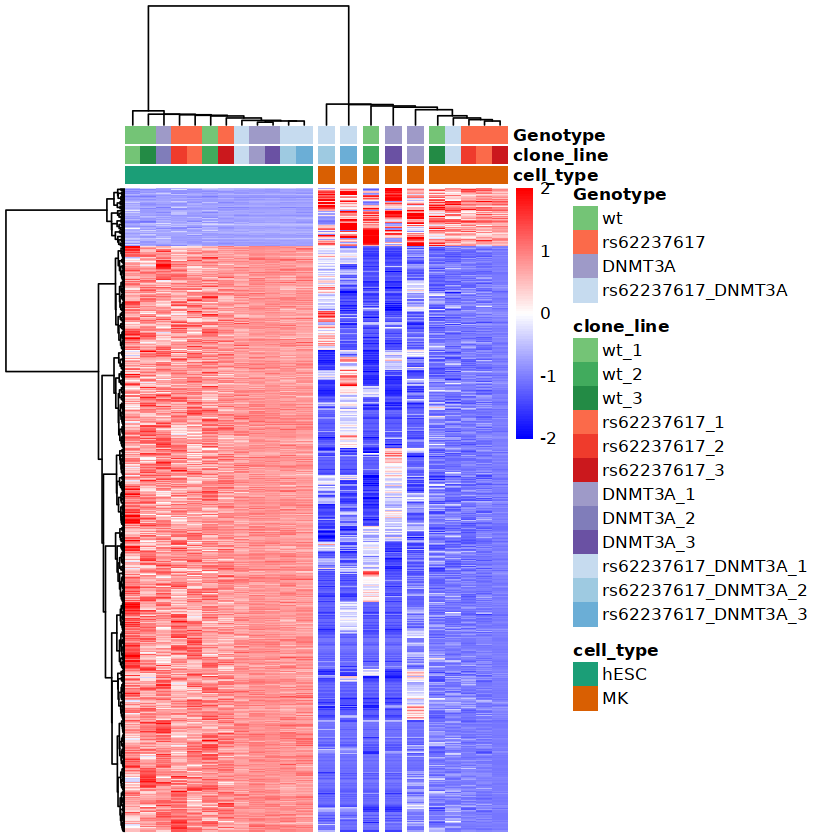

In [126]:
heatmap<-pheatmap(Peak_count_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                      show_rownames=FALSE,
                    angle_col = "45",
                    clustering_method="ward.D2",
                    fontsize_row = 8, 
                    fontsize_col = 8,
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [127]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_explore_subclustering/")


svgname<-paste(paste("Heatmap_sanity_check",paste(cell_type_sel, collapse="_vs_"), sep='_'),".svg",sep='')


ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)
